In [ ]:
# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
plt.style.use("seaborn-darkgrid")
%matplotlib inline

In [2]:
# get data 

In [25]:
startup=pd.read_csv("50_startups.csv")
startup.rename(columns={'R&D Spend':'R_D','Marketing Spend':'Marketing'},inplace=True)
startup.head()

,R_D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
# checking for null values
startup.isna().sum()

R_D               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [27]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
startup.describe().T

,count,mean,std,min,25%,50%,75%,max
R_D,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [29]:
# correlation
correlation = startup.corr()
correlation

,R_D,Administration,Marketing,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

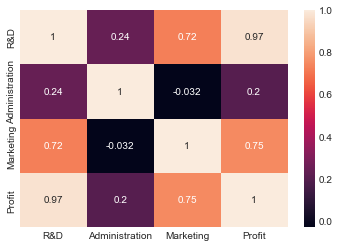

In [20]:
# heatmap of correlation
sns.heatmap(correlation,annot=True)

Text(0.5, 1.0, 'correlation between variables')

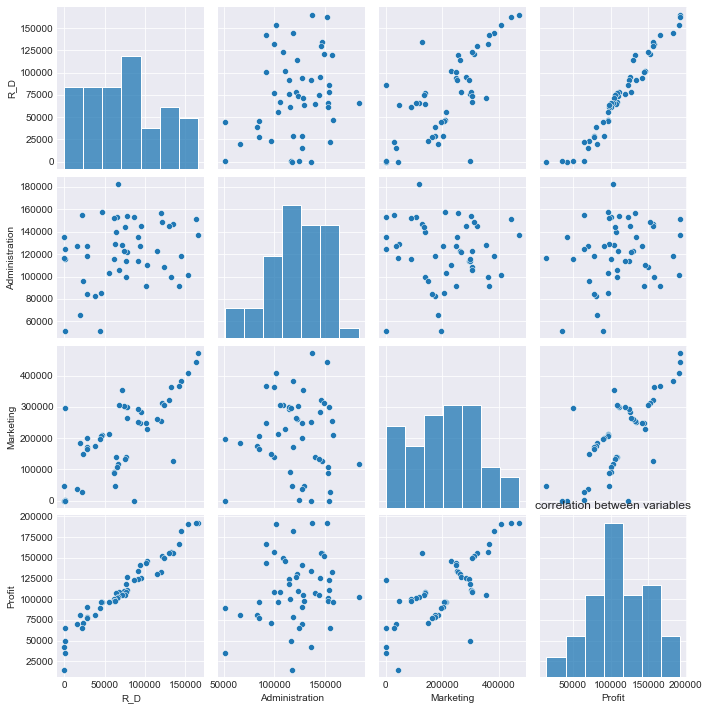

In [30]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)
plt.title("correlation between variables")

In [33]:
model = smf.ols('Profit~R_D+Administration+Marketing',data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        19:07:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model.params

Intercept         50122.192990
R_D                   0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [35]:
model.resid # residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [ ]:
# checking for colinearity using vif 
# VIF = 1 → No correlation
# VIF = 1 to 5 → Moderate correlation
# VIF >10 → High correlation

In [62]:
sq_R_D=smf.ols('R_D~Administration+Marketing',data=startup).fit().rsquared
vif_R_D=1/(1-rsq_R_D)

rsq_Administration=smf.ols('Administration~R_D+Marketing',data=startup).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_Marketing=smf.ols('Marketing~R_D+Administration',data=startup).fit().rsquared
vif_Marketing=1/(1-rsq_Marketing) 


In [65]:
# putting the values in dataframe

vif=pd.DataFrame({'Variables':['R_D','Administration','Marketing'],
                  'VIF':[vif_R_D,vif_Administration,vif_Marketing]})
vif
# no significant colinearity detected

,Variables,VIF
0,R_D,2.468903
1,Administration,1.175091
2,Marketing,2.326773


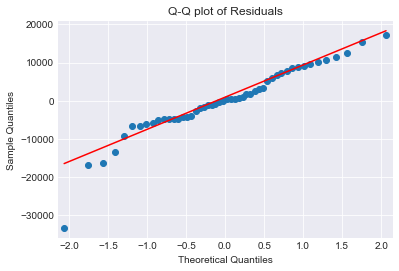

In [67]:
# QQ-plot
qq_plot=sm.qqplot(model.resid,line='q')
plt.title ("Q-Q plot of Residuals")
plt.show()

In [ ]:
# checking for homoscedasticity
def get_standardized_values(vals) :
    return(vals-vals.mean())/vals.std()  # changing into z score or standardizing

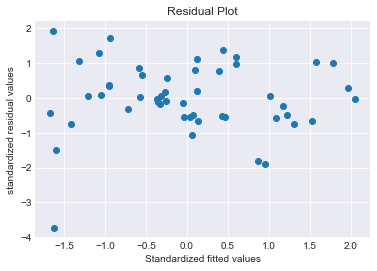

In [68]:
#residual plot
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [70]:
# applying cooks distance
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance 

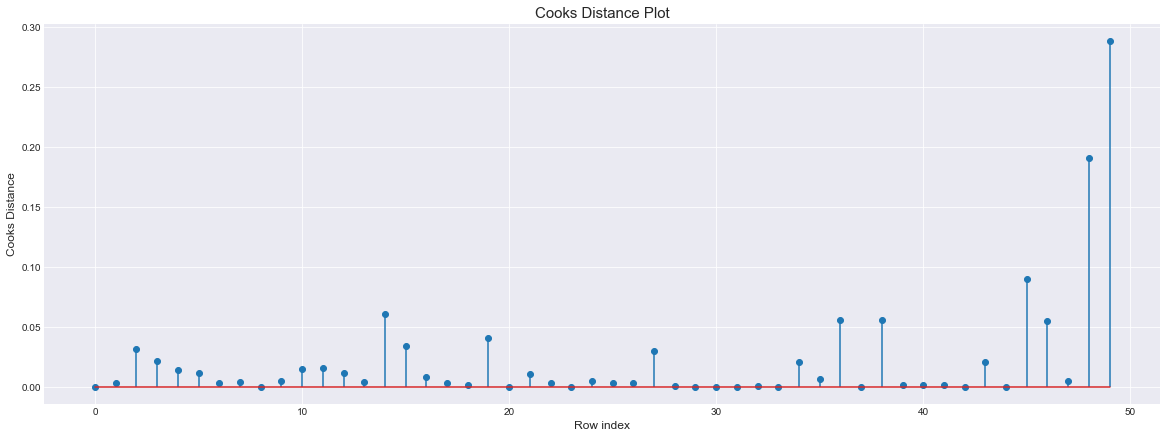

In [72]:
# stem plot
plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.title('Cooks Distance Plot',size=15)
plt.xlabel('Row index',size=12)
plt.ylabel('Cooks Distance',size=12)
plt.show()


In [73]:
# finding max value
np.argmax(c),np.max(c) 

(49, 0.2880822927543267)

In [77]:
#deleting outlier(49th array)
new_startup=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
new_startup.head()

,R_D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#  checking Administration and Marketing individually for significance

In [78]:
# modelling 
new_model = smf.ols('Profit~R_D+Administration+Marketing',data=new_startup).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        20:08:24   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
R_D                0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing          0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
new_model.params

Intercept         52382.439251
R_D                   0.783002
Administration       -0.022201
Marketing             0.025234
dtype: float64

In [ ]:
# Administration : P>|t| = 0.602 > 0.05 .... insignificant
# Marketing :P>|t| = 0.105 > 0.05 .... insignificant

In [41]:
model_admin = smf.ols('Profit~Administration',data=startup).fit()
model_admin.pvalues
# greater than 0.05 
# Administration is insignificant 

Intercept         0.003824
Administration    0.162217
dtype: float64

In [46]:
model_market = smf.ols('Profit~Marketing',data=startup).fit()
model_market.pvalues
# less than 0.05 
# Marketing is significant 

Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64

In [ ]:
# checking for r2 score the model with out Administration

In [81]:
new_model = smf.ols('Profit~R_D+Marketing',data=new_startup).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           3.74e-33
Time:                        20:22:00   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
R_D            0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
''' From the above summary it is clear that spend  on Adminisration has no contribution for the growth profits but practically Adminstration plays an vital role forthe development of startup  '''